# N.3 : Transformations d’histogramme

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def compute_hist(img):
    """
    Parameter
    ---------
    img : Numpy Array (HxW)
    Returns
    -------
    output: Numpy Array
        256d-array where the ith element corresponds to
        the number of pixels.
    """
    output = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[int(img[i][j])] += 1
    
    return output

### I. Algorithmes

**1.** Ecrivez l’algorithme de l’ETIREMENT d’histogramme des niveaux de gris d’une image (entre Imin et Imax) à 256 niveaux de gris entre 0 (noir) et 255 (blanc).

La taille de l’image est Nl x NC.

*Rappel :* 

* Formule d'étirement : $\frac{I_{i, j}-I_{min}}{I_{max}-I_{min}} \times 255$

In [3]:
def enhance_contrast(img):
    return 255*((img-img.min())/(img.max()-img.min()))

**2.** Ecrivez l’algorithme de l’EGALISATION d’histogramme des niveaux de gris d’une image (entre Imin et Imax) à 256 niveaux de gris entre 0 (noir) et 255 (blanc).

L’image est de taille NL x NC.

*Rappel :*

* Formule d'uniformisation : $f(x) = \frac{255}{N_{pixels}} \times \sum^{x}_{n=0} H(n)$

In [4]:
def uniformization(img):
    hist = compute_hist(img)
    output_img = np.zeros(img.shape)
    N = output_img.shape[0]*output_img.shape[1]
    for i in range(output_img.shape[0]):
        for j in range(output_img.shape[1]):
            output_img[i][j] = (255/N)*sum(hist[:int(img[i][j])])
    return output_img

### II. Programmation

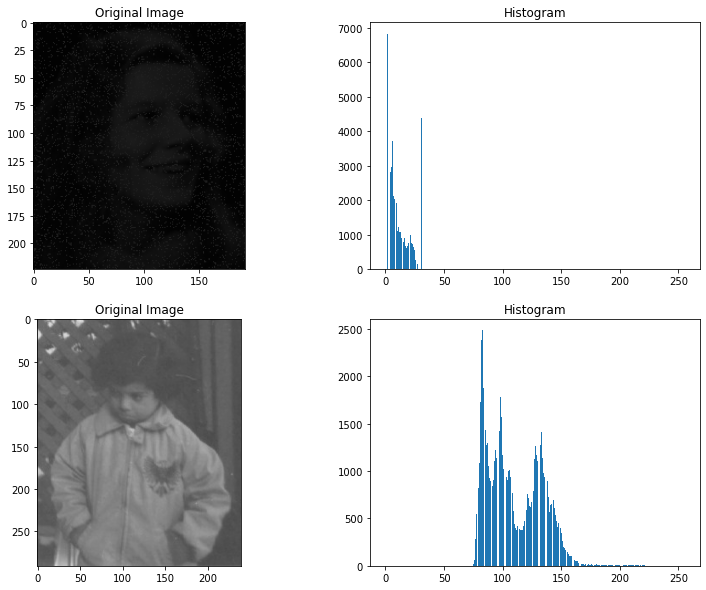

In [5]:
# loads images
img1 = cv2.imread("./data/histo_imageTest_entree.png")
img2 = cv2.imread("./data/pouttif.jpg")
# computes histograms
hist1 = compute_hist(cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY))
hist2 = compute_hist(cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY))
# displays images and histograms
fig, axs = plt.subplots(2,2, figsize=(13,10))
axs[0][0].set_title("Original Image")
axs[0][0].imshow(img1)
axs[0][1].set_title("Histogram")
axs[0][1].bar(np.array([i for i in range(256)]), hist1)
axs[1][0].set_title("Original Image")
axs[1][0].imshow(img2)
axs[1][1].set_title("Histogram")
axs[1][1].bar(np.array([i for i in range(256)]), hist2)

plt.show()

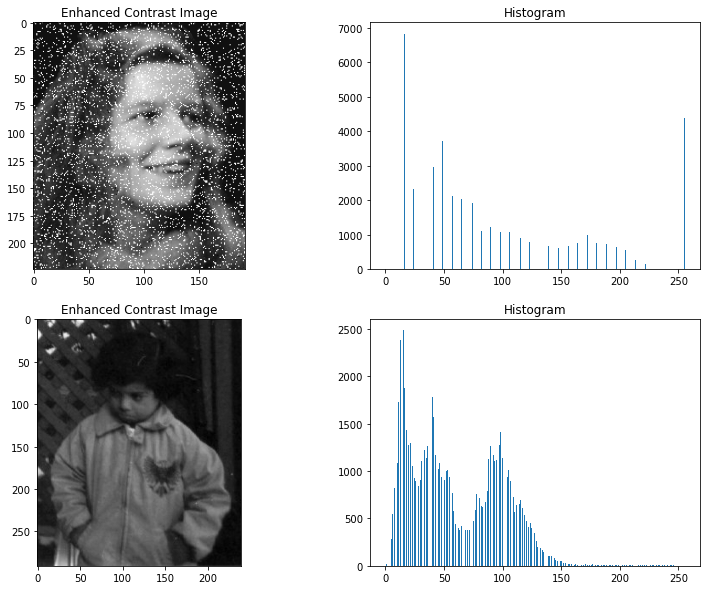

In [6]:
# enhances image contrasts
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
new_img1 = enhance_contrast(img1)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
new_img2 = enhance_contrast(img2)
# computes histograms
hist1 = compute_hist(new_img1)
hist2 = compute_hist(new_img2)
# displays images and histograms
fig, axs = plt.subplots(2,2, figsize=(13,10))
axs[0][0].set_title("Enhanced Contrast Image")
axs[0][0].imshow(new_img1, cmap=plt.cm.gray)
axs[0][1].set_title("Histogram")
axs[0][1].bar(np.array([i for i in range(256)]), hist1)
axs[1][0].set_title("Enhanced Contrast Image")
axs[1][0].imshow(new_img2, cmap=plt.cm.gray)
axs[1][1].set_title("Histogram")
axs[1][1].bar(np.array([i for i in range(256)]), hist2)

plt.show()

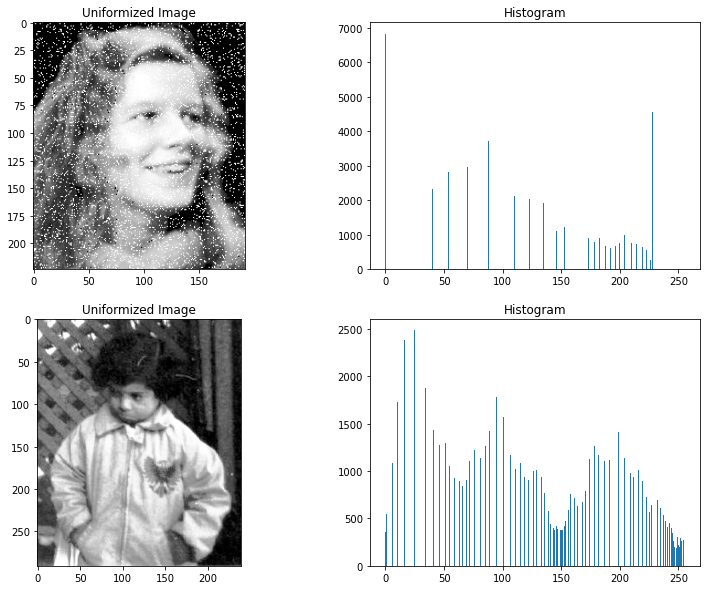

In [7]:
# uniformizes images
unif_img1 = uniformization(new_img1)
unif_img2 = uniformization(new_img2)
# computes histograms
hist1 = compute_hist(unif_img1)
hist2 = compute_hist(unif_img2)
# displays images and histograms
fig, axs = plt.subplots(2, 2, figsize=(13,10))
axs[0][0].set_title("Uniformized Image")
axs[0][0].imshow(unif_img1, cmap=plt.cm.gray)
axs[0][1].set_title("Histogram")
axs[0][1].bar(np.array([i for i in range(256)]), hist1)
axs[1][0].set_title("Uniformized Image")
axs[1][0].imshow(unif_img2, cmap=plt.cm.gray)
axs[1][1].set_title("Histogram")
axs[1][1].bar(np.array([i for i in range(256)]), hist2)

plt.show()